In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import random 
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('crimen_nac.csv', encoding='latin-1')

In [3]:
df = df[df['Año'] != 2023]

In [4]:
df

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Sexo/Averiguación previa,Rango de edad
0,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Abuso sexual,Abuso sexual,6,4,0,...,1,1,1.0,1.0,0.0,0.0,1.0,1.0,Averiguación previa,No aplica
1,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Acoso sexual,Acoso sexual,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Averiguación previa,No aplica
2,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Hostigamiento sexual,Hostigamiento sexual,1,1,0,...,3,0,1.0,0.0,0.0,1.0,0.0,3.0,Averiguación previa,No aplica
3,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación simple,Violación simple,5,5,3,...,3,15,8.0,8.0,6.0,9.0,5.0,6.0,Averiguación previa,No aplica
4,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación equiparada,Violación equiparada,0,5,3,...,3,4,4.0,4.0,3.0,5.0,3.0,0.0,Averiguación previa,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76731,2022,32,Zacatecas,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No identificado,No identificado
76732,2022,32,Zacatecas,El patrimonio,Extorsión,Extorsión,Extorsión,1,1,1,...,0,1,2.0,0.0,0.0,2.0,2.0,2.0,No identificado,No identificado
76733,2022,32,Zacatecas,La sociedad,Corrupción de menores,Corrupción de menores,Corrupción de menores,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No identificado,No identificado
76734,2022,32,Zacatecas,La sociedad,Trata de personas,Trata de personas,Trata de personas,0,1,1,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,No identificado,No identificado


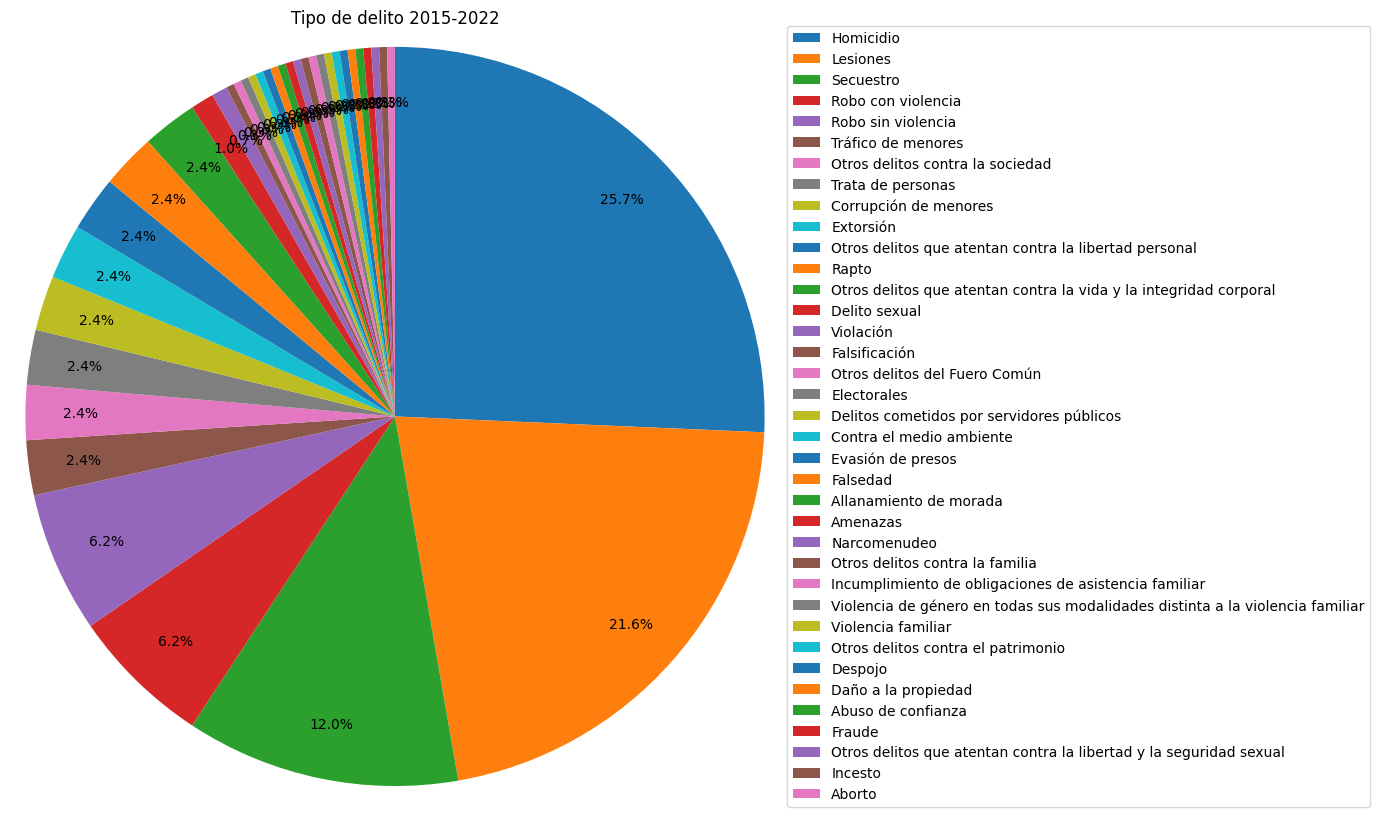

In [9]:
tipo_delito_counts = df['Tipo de delito'].value_counts()

plt.figure(figsize=(10, 10)) 
patches, texts, autotexts = plt.pie(tipo_delito_counts, labels=None, autopct='%1.1f%%', startangle=90, counterclock=False, pctdistance=0.85, radius=1.2)

plt.legend(tipo_delito_counts.index, bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Tipo de delito 2015-2022")
plt.show()

In [18]:
month_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crea una nueva columna 'Total_Crimes' que es la suma de los crímenes de todos los meses
df['Total_Crimes'] = df[month_columns].sum(axis=1)

# Convierte la columna 'entidad' a mayúscula para asegurarse de que la primera letra sea mayúscula
df['Entidad'] = df['Entidad'].str.capitalize()

# Agrupa los datos por entidad y suma el total de crímenes
total_crimes_by_entity = df.groupby('Entidad')['Total_Crimes'].sum().reset_index()

# Ordena las entidades por la cantidad total de crímenes de mayor a menor
total_crimes_by_entity = total_crimes_by_entity.sort_values(by='Total_Crimes', ascending=False)

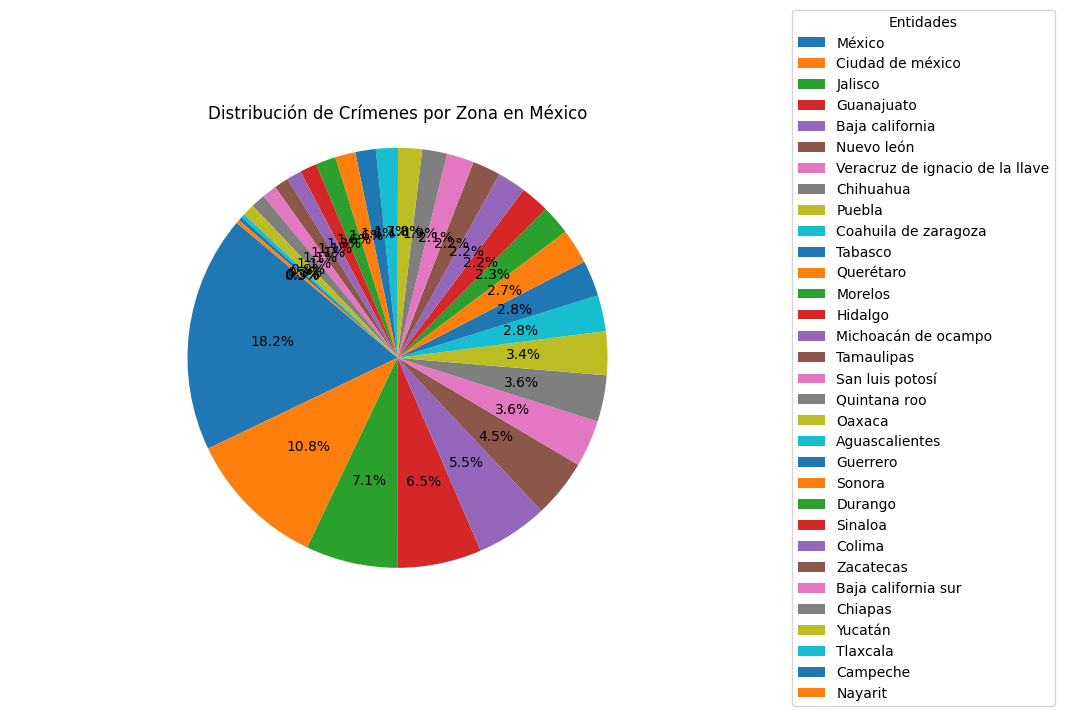

In [19]:

# Crea el pie chart sin nombres pero con porcentajes, sin agujero en el medio
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(total_crimes_by_entity['Total_Crimes'], labels=None, autopct='%1.1f%%', startangle=140)

# Etiquetas de las entidades de costado
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Etiquetas de las entidades como referencia de costado
plt.legend(total_crimes_by_entity['Entidad'], title="Entidades", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribución de Crímenes por Zona en México')
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto

plt.show()

